In [750]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Read Data

In [751]:
Diabetes_Data= pd.read_csv('D:\Liverpool Programming\Applied AI\Assignment/diabetes.csv')

In [752]:
pd.set_option('display.max_rows', Diabetes_Data.shape[0]+1)

Diabetes_Data.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [753]:
Diabetes_Data.groupby('Outcome').count()
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


### DATA CLEANING

In [754]:
col_list=[]

for col in Diabetes_Data.columns:
    col_list.append(col)



for col in Diabetes_Data.columns:
    if str(col) == "Outcome" or str(col) == "Pregnancies":
        pass
    else:
        Diabetes_Data[str(col)]= Diabetes_Data[str(col)].replace(0,np.nan)


""" Diabetes_Data= Diabetes_Data[Diabetes_Data.isnull().sum( axis=1) < 2]
Diabetes_Data.reset_index(inplace=True, drop= True)
Diabetes_Data.head() """
       
""" Diabetes_Data.dropna(inplace=True)
Diabetes_Data.reset_index(inplace=True ,drop= True)
 """


' Diabetes_Data.dropna(inplace=True)\nDiabetes_Data.reset_index(inplace=True ,drop= True)\n '

In [755]:
Diabetes_Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Inputting NaN with mean

In [756]:
def mean_target(var):   
    temp = Diabetes_Data[Diabetes_Data[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].mean().reset_index()
    return temp

In [757]:
""" for col in col_list:
    if col != 'Outcome' and col != 'Pregnancies':  
        Diabetes_Data.loc[(Diabetes_Data['Outcome'] == 0 ) & (Diabetes_Data[col].isnull()), col] = mean_target(col)[col][0]
        Diabetes_Data.loc[(Diabetes_Data['Outcome'] == 1 ) & (Diabetes_Data[col].isnull()), col] = mean_target(col)[col][1]

Diabetes_Data.head() """

" for col in col_list:\n    if col != 'Outcome' and col != 'Pregnancies':  \n        Diabetes_Data.loc[(Diabetes_Data['Outcome'] == 0 ) & (Diabetes_Data[col].isnull()), col] = mean_target(col)[col][0]\n        Diabetes_Data.loc[(Diabetes_Data['Outcome'] == 1 ) & (Diabetes_Data[col].isnull()), col] = mean_target(col)[col][1]\n\nDiabetes_Data.head() "

## Inputting NaN with Knn inputter


In [758]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors= 5)
After_imputation = imputer.fit_transform(Diabetes_Data)

In [759]:
After_imputation = imputer.fit_transform(Diabetes_Data)

In [760]:

df= pd.DataFrame(After_imputation,columns=col_list)
Diabetes_Data=df
Diabetes_Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [761]:

Diabetes_Data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Plotting Outliers

<Figure size 576x432 with 0 Axes>

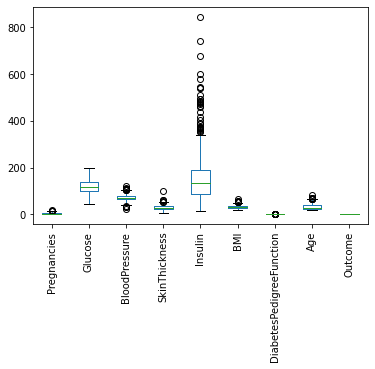

In [762]:
figure(figsize=(8, 6))
Diabetes_Data.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

Removing data with Z score > 3 

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


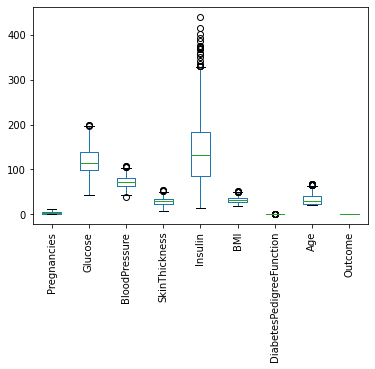

In [763]:

col_list=[]

for col in Diabetes_Data.columns:
    col_list.append(col)
print(col_list)    
keys=[]
outlier_index=[]


for col in col_list:

    z=abs((Diabetes_Data[col]-Diabetes_Data[col].mean())/Diabetes_Data[col].std())

    keys += np.where(z>3)[0].tolist()

for k in keys:

    if k not in outlier_index:

        outlier_index.append(k)

outlier_index.sort()


Cleaned_Data = Diabetes_Data.drop(outlier_index)
    
Cleaned_Data.plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [764]:

Diabetes_Data= Cleaned_Data
Diabetes_Data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,58.6,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,25.8,164.6,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,5.0,116.0,74.0,20.6,102.8,25.6,0.201,30.0,0.0


## Checking the data and Interdependance using Pairplot and Heat map

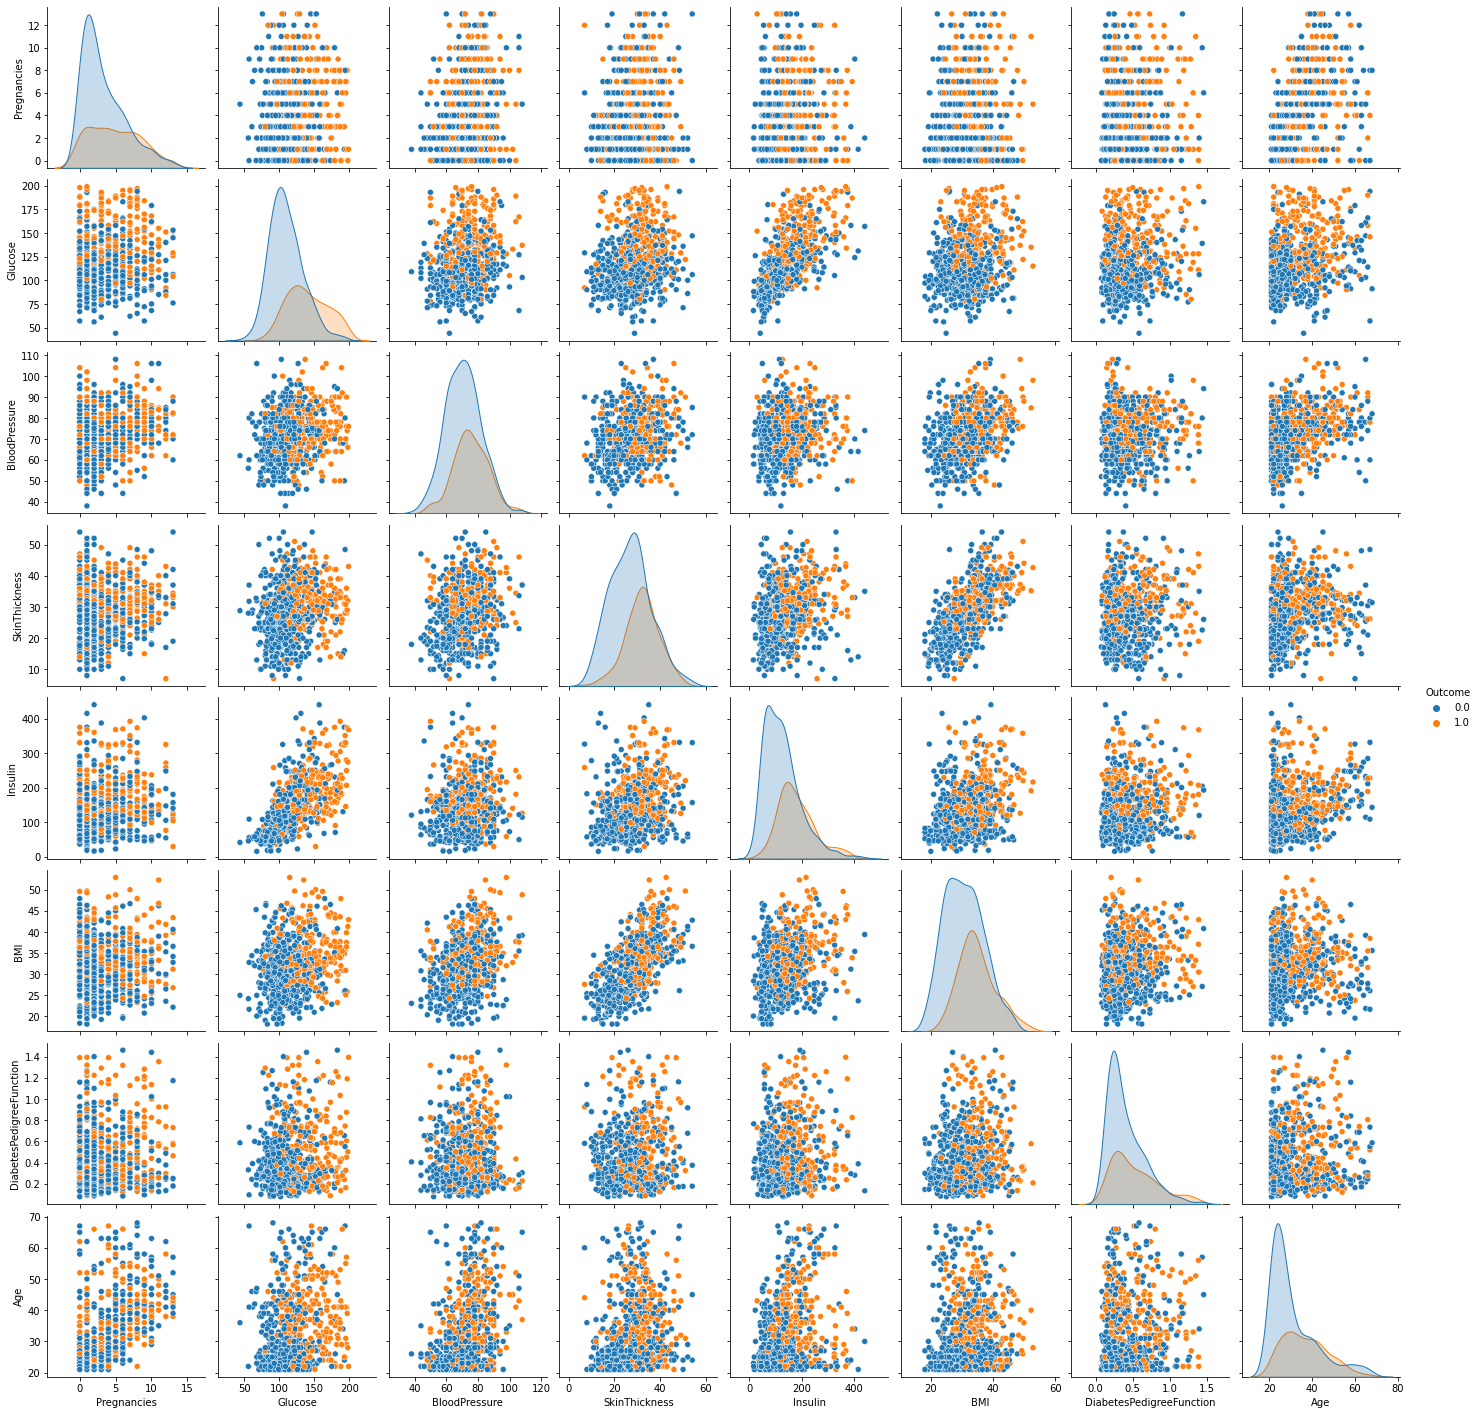

In [765]:
import seaborn as sns
sns.pairplot(Diabetes_Data, height= 2.5, hue= 'Outcome')

<AxesSubplot:>

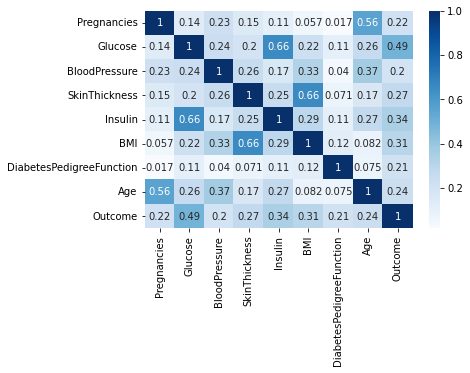

In [766]:
Data_cor= Diabetes_Data.corr()
plt.figure()
sns.heatmap(Data_cor, annot=True, cmap= 'Blues')

In [767]:
Data_cor['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.486362
Insulin                     0.343361
BMI                         0.307487
SkinThickness               0.270390
Age                         0.243188
Pregnancies                 0.217875
DiabetesPedigreeFunction    0.213078
BloodPressure               0.201516
Name: Outcome, dtype: float64

### Normalizing 


In [768]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

# Only required for training data 
X= Diabetes_Data.iloc[:,:-1]
Y= Diabetes_Data.iloc[:,-1]

In [769]:
X_std= std.fit_transform(X)
X_df = pd.DataFrame(X_std, columns= col_list[:-1])

In [770]:
len(X_df)

720

# Balancing Data

In [771]:

from imblearn.over_sampling import RandomOverSampler


In [772]:
over = RandomOverSampler()
x, y = over.fit_resample(X_df, Y)

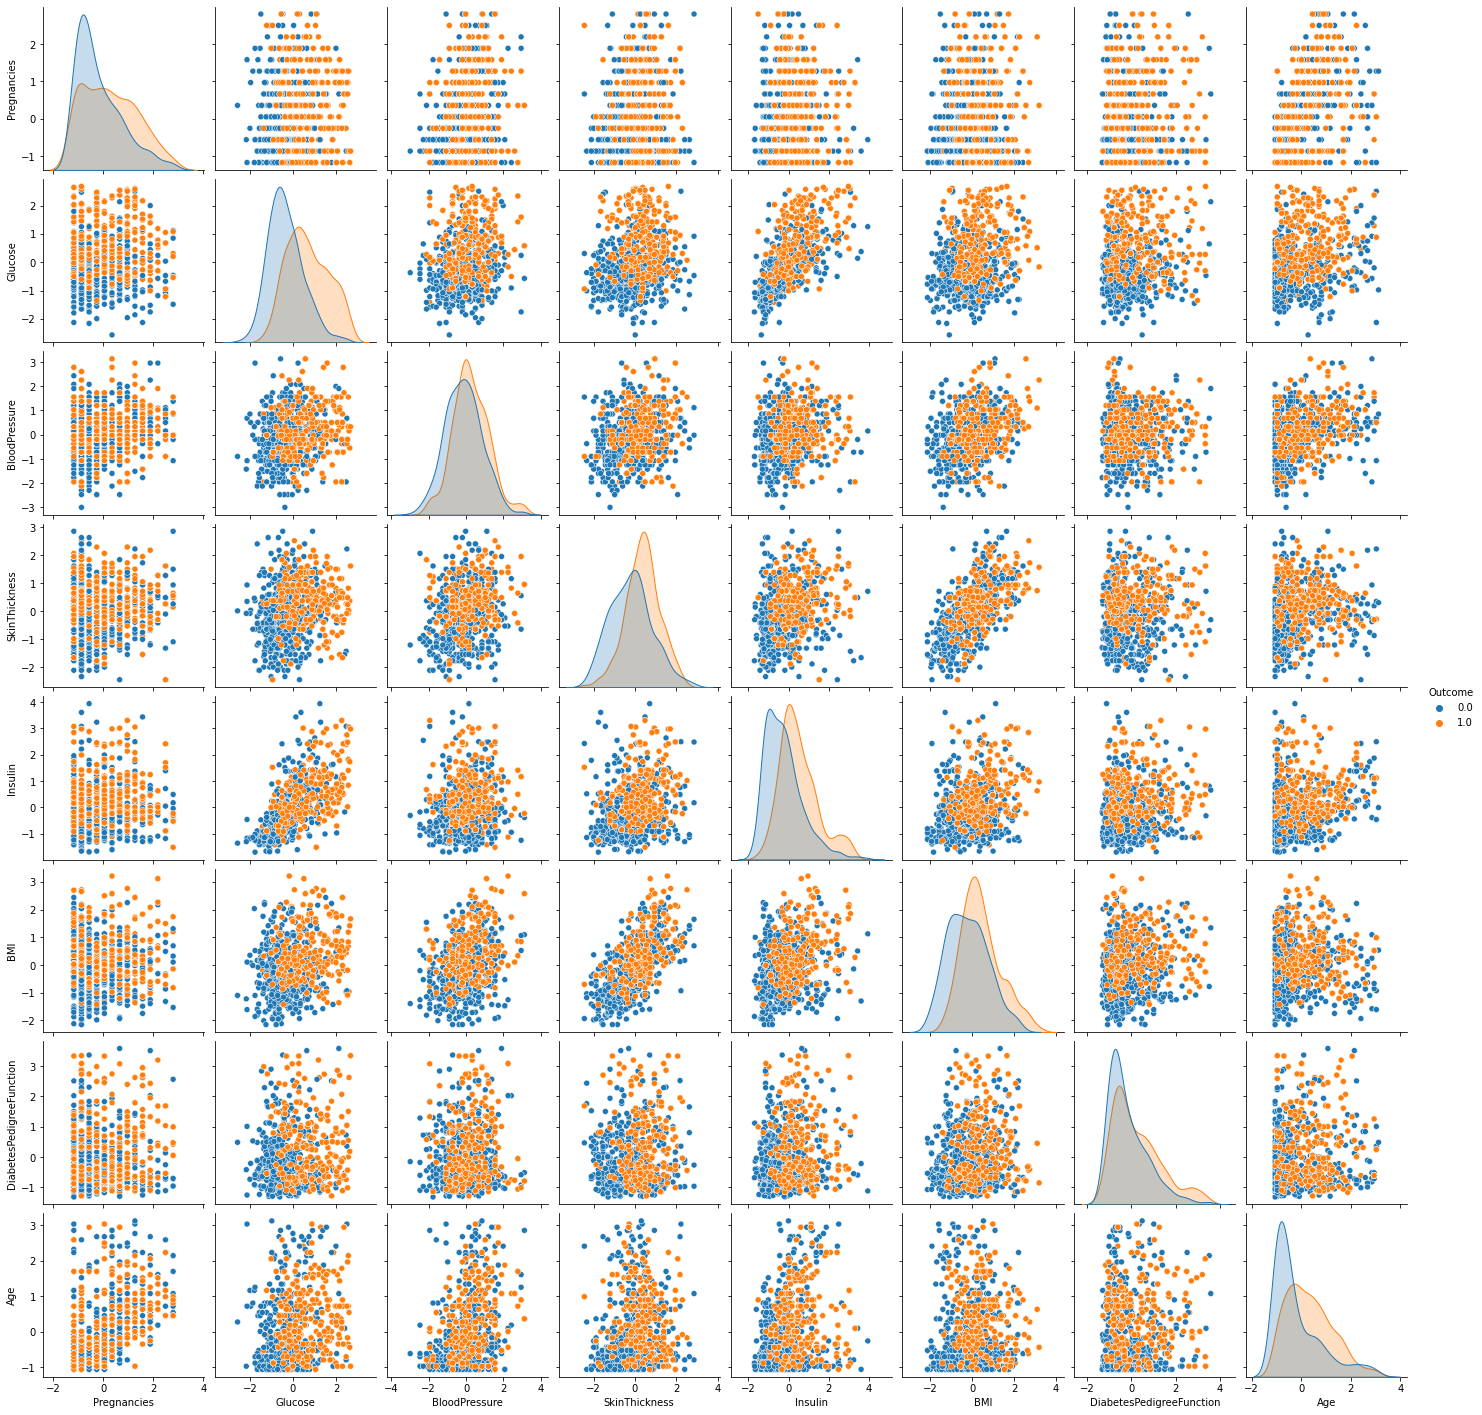

In [773]:
Plot= x
Plot['Outcome']= y


sns.pairplot(Plot, height= 2.5, hue= 'Outcome')


In [774]:
x.drop(columns='Outcome', inplace=True) 

In [775]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.661821,0.949750,-0.019488,0.713045,0.345061,0.228432,0.629809,1.521577
1,-0.864480,-1.180888,-0.544339,0.034523,-1.117994,-0.851362,-0.347534,-0.165638
2,1.272342,2.133438,-0.719290,-0.327355,0.286750,-1.360408,0.789159,-0.076837
3,-0.864480,-1.045610,-0.544339,-0.643999,-0.648862,-0.619978,-0.999097,-1.053646
4,0.356561,-0.132479,0.155463,-0.915408,-0.532242,-1.005619,-0.878700,-0.254439
...,...,...,...,...,...,...,...,...
953,-0.864480,-0.233938,-0.719290,0.713045,-0.330807,0.228432,0.332357,-1.053646
954,-0.559220,-0.504495,0.680315,1.843915,0.636611,0.243858,0.927262,-0.343240
955,0.967081,2.167257,1.030216,0.486871,0.596854,0.521519,-0.333370,0.722370
956,0.356561,0.577734,3.129623,0.961836,-0.230090,2.573129,-0.786631,0.367167


0.0    479
1.0    479
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'After Balancing The Class')

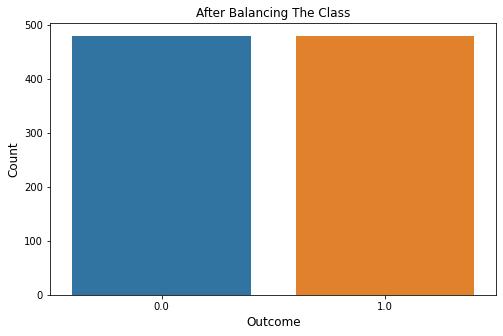

In [776]:
print(y.value_counts())
plt.figure(figsize = (8,5))
sns.countplot(x = y)
plt.xlabel('Outcome', size = 12)
plt.ylabel('Count', size = 12)
plt.title('After Balancing The Class', size = 12)

### SPLITTING TRAINING AND TEST 

In [777]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state= 20)

In [778]:
len(X_train)

766

In [779]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, Y_train)
print(clf.score(X_test, Y_test))

0.7552083333333334


# Learning 

In [780]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV


## Random Forest

In [781]:
from sklearn.ensemble import RandomForestClassifier

Random_Forest=RandomForestClassifier()
parameters= {'n_estimators': [200, 500],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth': [5,6,7,8,9,10,11,12],
                'criterion': ['gini', 'entropy']
                }


In [782]:
clf= GridSearchCV(estimator= Random_Forest, param_grid= parameters, cv=5)

In [783]:
clf.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [784]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'auto',
 'n_estimators': 500}

In [785]:
Random_F=RandomForestClassifier(criterion=clf.best_params_['criterion'],max_depth= clf.best_params_['max_depth'], max_features= clf.best_params_['max_features'], n_estimators= clf.best_params_['n_estimators'])

In [786]:
Random_F.fit(X_train,Y_train)

RandomForestClassifier(max_depth=12, n_estimators=500)

In [787]:
Y_pred_RF= Random_F.predict(X_test)


C:\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


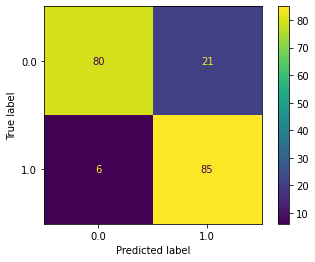

In [788]:

Matrix = confusion_matrix(Y_test, Y_pred_RF)
TN, FP, FN, TP = Matrix.ravel()

#confusion matrix
plot_confusion_matrix(Random_F,X_test,Y_test )
plt.show()

In [789]:
Accuracy_RF= accuracy_score(Y_test,Y_pred_RF)

Precision_RF=precision_score(Y_test,Y_pred_RF)
recall_RF=recall_score(Y_test,Y_pred_RF)
f1_RF=f1_score(Y_test,Y_pred_RF)

print("Accuracy :",Accuracy_RF)
print("Precision: ",Precision_RF)
print("Recall: ", recall_RF)
print("F1 Score: " , f1_RF)


Accuracy : 0.859375
Precision:  0.8018867924528302
Recall:  0.9340659340659341
F1 Score:  0.8629441624365483


## KNN


In [790]:
from sklearn.neighbors import KNeighborsClassifier

KNN =KNeighborsClassifier()
k_ran= list(range(1,20))

parameters_Knn= {
                'n_neighbors':k_ran,
                'metric':('euclidean', 'manhattan'),
                'weights':('uniform', 'distance'),
}



In [791]:
clf_Knn = GridSearchCV(estimator=KNN, param_grid= parameters_Knn , cv= 5)

In [792]:
clf_Knn.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ('euclidean', 'manhattan'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ('uniform', 'distance')})

In [793]:
clf_Knn.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [794]:
KNN_opt = KNeighborsClassifier(metric= clf_Knn.best_params_['metric'], n_neighbors= clf_Knn.best_params_['n_neighbors'], weights= clf_Knn.best_params_['weights'])

In [795]:
KNN_opt.fit(X_train,Y_train)

KNeighborsClassifier(metric='manhattan', weights='distance')

In [796]:
Y_pred_knn = KNN_opt.predict(X_test)

C:\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


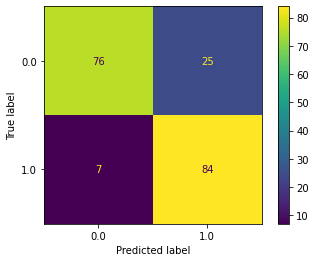

In [797]:
Matrix = confusion_matrix(Y_test, Y_pred_knn)
TN, FP, FN, TP = Matrix.ravel()

#confusion matrix
plot_confusion_matrix(KNN_opt,X_test,Y_test )
plt.show()

In [798]:
Accuracy_KNN=accuracy_score(Y_test,Y_pred_knn)
Precision_KNN=precision_score(Y_test,Y_pred_knn)
recall_KNN=recall_score(Y_test,Y_pred_knn)
f1_KNN=f1_score(Y_test,Y_pred_knn)
print("Accuracy :",Accuracy_KNN)
print("Precision: ",Precision_KNN)
print("Recall: ", recall_KNN)
print("F1 Score: " , f1_KNN)

Accuracy : 0.8333333333333334
Precision:  0.7706422018348624
Recall:  0.9230769230769231
F1 Score:  0.84


## SVM

In [799]:
from sklearn.svm import SVC

SVM =SVC()
parameters_SVM= [{
                    'kernel': ['linear','poly', 'sigmoid'],
                    'C': [1,2,3,100,200,300,500],
                    'max_iter': [100, 500 , 1000 , 2000 , 5000, 10000 ]
}]


In [800]:
clf_SVM= GridSearchCV(estimator= SVM ,param_grid=parameters_SVM , cv= 5)

In [801]:
clf_SVM.fit(X_train,Y_train)

C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 2, 3, 100, 200, 300, 500],
                          'kernel': ['linear', 'poly', 'sigmoid'],
                          'max_iter': [100, 500, 1000, 2000, 5000, 10000]}])

In [802]:
clf_SVM.best_params_

{'C': 1, 'kernel': 'linear', 'max_iter': 1000}

In [803]:
SVM_opt= SVC(C= clf_SVM.best_params_['C'], kernel= clf_SVM.best_params_['kernel'], max_iter= clf_SVM.best_params_['max_iter'])

In [804]:
SVM_opt.fit(X_train, Y_train)

C:\Python\Python37\lib\site-packages\sklearn\svm\_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


SVC(C=1, kernel='linear', max_iter=1000)

In [805]:
Y_pred_SVM = SVM_opt.predict(X_test)

C:\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


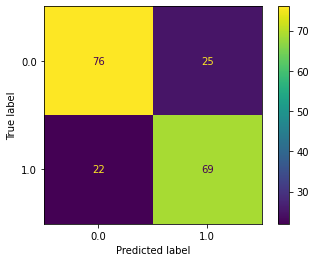

In [806]:
Matrix = confusion_matrix(Y_test, Y_pred_SVM)
TN, FP, FN, TP = Matrix.ravel()

#confusion matrix
plot_confusion_matrix(SVM_opt ,X_test,Y_test )
plt.show()

In [807]:
Accuracy_SVM=accuracy_score(Y_test,Y_pred_SVM)
Precision_SVM=precision_score(Y_test,Y_pred_SVM)
recall_SVM=recall_score(Y_test,Y_pred_SVM)
f1_SVM=f1_score(Y_test,Y_pred_SVM)
print("Accuracy :",Accuracy_SVM)
print("Precision: ",Precision_SVM)
print("Recall: ", recall_SVM)
print("F1 Score: " , f1_SVM)

Accuracy : 0.7552083333333334
Precision:  0.7340425531914894
Recall:  0.7582417582417582
F1 Score:  0.745945945945946


# PLOTING

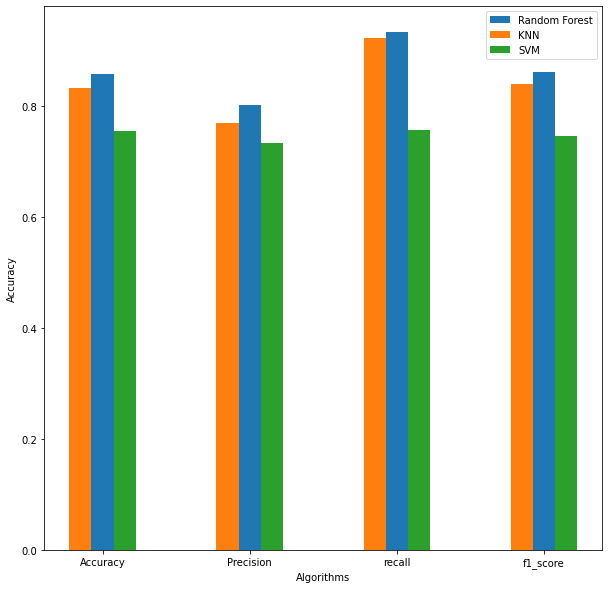

In [808]:
X= ['Accuracy', 'Precision', 'recall', 'f1_score']
RF= [Accuracy_RF,Precision_RF,recall_RF,f1_RF]
KNN= [Accuracy_KNN,Precision_KNN,recall_KNN,f1_KNN]
SVM= [Accuracy_SVM,Precision_SVM,recall_SVM,f1_SVM]

len_X= np.arange(len(X))

plt.figure(figsize=(10,10))

plt.bar(len_X  , RF ,0.15, label='Random Forest')
plt.bar(len_X - 0.15, KNN ,0.15, label='KNN')
plt.bar(len_X + 0.15, SVM ,0.15, label='SVM')


plt.xticks(len_X, X)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.legend()
plt.show()